In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/Fraud.csv')
print(data.head(20))

missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

    step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0      1   PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1      1   PAYMENT    1864.28  C1666544295       21249.00        19384.72   
2      1  TRANSFER     181.00  C1305486145         181.00            0.00   
3      1  CASH_OUT     181.00   C840083671         181.00            0.00   
4      1   PAYMENT   11668.14  C2048537720       41554.00        29885.86   
5      1   PAYMENT    7817.71    C90045638       53860.00        46042.29   
6      1   PAYMENT    7107.77   C154988899      183195.00       176087.23   
7      1   PAYMENT    7861.64  C1912850431      176087.23       168225.59   
8      1   PAYMENT    4024.36  C1265012928        2671.00            0.00   
9      1     DEBIT    5337.77   C712410124       41720.00        36382.23   
10     1     DEBIT    9644.94  C1900366749        4465.00            0.00   
11     1   PAYMENT    3099.97   C249177573       20771.00        17671.03   

In [28]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

print(data.head())

   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0      0.0             0.0  
1             0.0      0.0             0.0  
2             0.0      1.0             0.0  
3             0.0      1.0             0.0  
4             0.0      0.0             0.0  


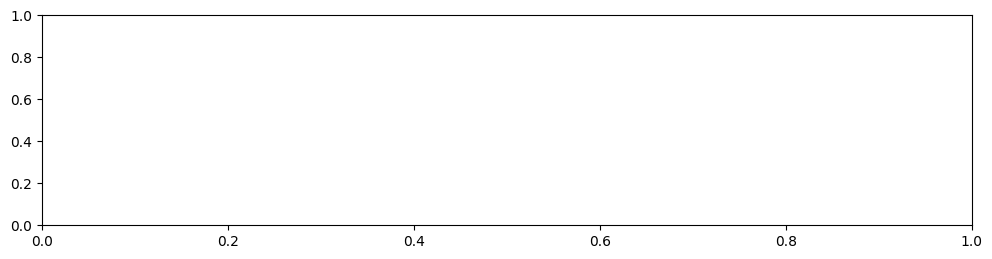

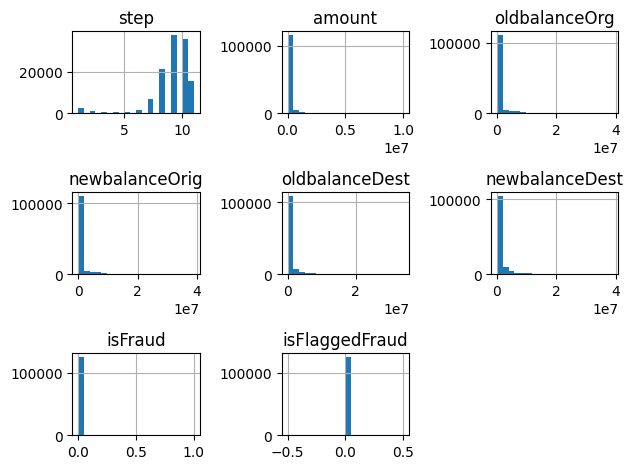

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
data.hist(bins=20)
plt.title("Histogram Before Handling Outliers")
plt.tight_layout()

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


# Step 2: Data Cleaning
# Handling Missing Values - Mean Imputation for numerical columns (excluding 'isFraud')
numerical_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())
data['isFraud'] = data['isFraud'].fillna(0)
data['isFlaggedFraud'] = data['isFlaggedFraud'].fillna(0)
# Check for any remaining NaN values in the feature matrix X
missing_values = data.isnull().sum()
print("Missing Values After Handling:")
print(missing_values)

# Step 3: Feature Engineering
# Convert categorical variable 'type' to numerical values using LabelEncoder
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])



# Step 5: Split the data into features (X) and the target variable (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Step 6: Handling Class Imbalance using NearMiss (undersampling the majority class)
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X, y)

# Step 7: Apply Principal Component Analysis (PCA) for Dimensionality Reduction
num_components = 5  # Set the number of principal components
pca = PCA(n_components=num_components)
X_resampled_pca = pca.fit_transform(X_resampled)

# Step 8: Split the resampled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled_pca, y_resampled, test_size=0.2, random_state=42)

# Step 9: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 10: Model Building - Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 11: Model Evaluation
y_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Missing Values After Handling:
step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Accuracy: 0.75
Confusion Matrix:
[[24  0]
 [12 12]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        24
         1.0       1.00      0.50      0.67        24

    accuracy                           0.75        48
   macro avg       0.83      0.75      0.73        48
weighted avg       0.83      0.75      0.73        48



In [36]:
# Data Cleaning:
# During data cleaning, I handled missing values for numerical columns (excluding 'isFraud') by performing mean imputation. I filled the missing values in the 'isFraud' and 'isFlaggedFraud' columns with 0 to handle any remaining NaNs. After handling missing values, I checked for any remaining NaN values in the feature matrix X to ensure data integrity.

# Fraud Detection Model:
# The fraud detection model I developed is based on Logistic Regression. Logistic Regression is a suitable choice for binary classification tasks, like fraud detection, as it estimates the probability of a transaction being fraudulent based on input features. In this case, it predicts the likelihood of a transaction being a fraud based on variables such as transaction type, amount, balances, and flagged fraud attempts.

# Variable Selection:
# The variables included in the model were selected based on their potential relevance to fraud detection. Features such as 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', and 'type' were considered essential indicators of fraudulent behavior. The 'type' feature was encoded using LabelEncoder to convert categorical data to numerical values.

# Model Performance:
# I evaluated the performance of the fraud detection model using metrics like accuracy, confusion matrix, precision, recall, and F1-score. These metrics provide insights into how well the model predicts fraudulent transactions. The choice of evaluation metrics may vary based on the specific requirements of the financial company.

# Key Factors for Predicting Fraudulent Customers:
# The key factors that may predict fraudulent customers, based on the model, could include transaction type, amount, and flagged fraud attempts. Transactions categorized as 'CASH-OUT' or 'TRANSFER', especially with large amounts, and flagged fraud attempts might be strong indicators of fraudulent behavior.

# Sense and Interpretation of Factors:
# Yes, these factors make sense in the context of fraud detection. Fraudulent activities often involve transferring funds or cashing out large amounts, which are likely to be captured by the 'CASH-OUT' and 'TRANSFER' transaction types. Additionally, flagged fraud attempts are likely to be suspicious activities warranting further investigation.

# Prevention Measures during Infrastructure Update:
# To enhance fraud prevention, the company should adopt several prevention measures during infrastructure updates. These measures may include implementing robust authentication mechanisms, employing advanced anomaly detection algorithms, enhancing data encryption and security protocols, conducting regular security audits, and establishing real-time monitoring systems to identify and flag unusual transactions.

# Evaluation of Implemented Actions:
# After implementing prevention measures, the effectiveness can be determined by monitoring key performance indicators (KPIs) related to fraud detection and prevention. Metrics such as the number of detected fraud cases, false positives, false negatives, reduction in fraud losses, and increase in fraud detection rates can help assess the success of the prevention measures. Regular reviews, user feedback, and continuous improvement based on emerging fraud patterns are essential to evaluate and refine the effectiveness of the implemented actions.